In [7]:
suppressPackageStartupMessages(library(tidyverse))
library(magrittr)

setwd("~/../Dropbox//Computational Genomics/Term Project/TCR_annotation/")

In [8]:
## Smith Waterman Annotation with unfiltered output of MiTCR
setwd("vdjdb_alignment_raw/")
sw_annotation <- suppressMessages(lapply(list.files(), read_tsv))
names(sw_annotation) <- tools::file_path_sans_ext(list.files())

In [ ]:
## Smith Waterman Annotation with underscores in query sequences removed
setwd("../vdjdb_alignment_remove_ambiguous/")
sw_annotation_RU <- suppressMessages(lapply(list.files(pattern = "*underscores.txt"), read_tsv))

names(sw_annotation_RU) <- tools::file_path_sans_ext(list.files(pattern = "*underscores.txt"))
## Smith Waterman Annotation with removed ambiguous bases
sw_annotation_RA  <- suppressMessages(lapply(list.files(pattern = "*ambiguous.txt"), read_tsv))

names(sw_annotation_RA) <- tools::file_path_sans_ext(list.files(pattern = "*ambiguous.txt"))
# See how scores are distributed across all samples, using the different scoring protocols

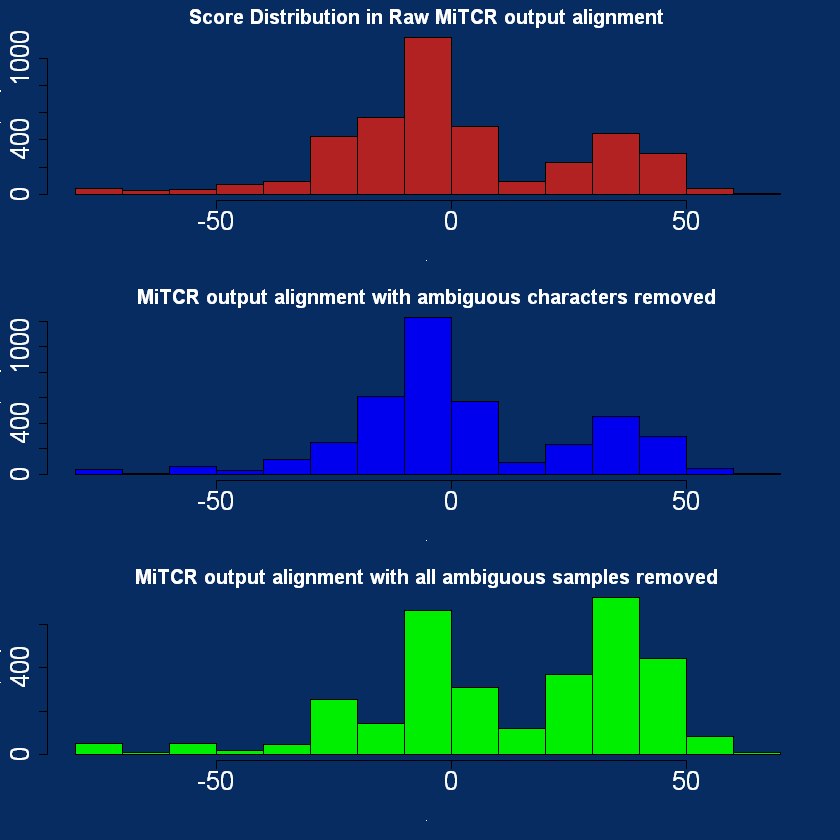

In [9]:
par(mfrow=c(3,1), bg = rgb(7, 44, 98, max = 255), 
    col.main = "white", col.lab = "white", col.axis = "white", 
    cex.axis = 2, cex.main = 1.5)
par(mar = c(5,3,2,2))
sw_annotation %>% map("score") %>% unlist %>% hist(main = "Score Distribution in Raw MiTCR output alignment", col = "firebrick")
sw_annotation_RU %>% map("score") %>% unlist %>% hist(main = "MiTCR output alignment with ambiguous characters removed", col = "blue2")
sw_annotation_RA %>% map("score") %>% unlist %>% hist(main = "MiTCR output alignment with all ambiguous samples removed", col = "green2")# What was the coverage across all samples?

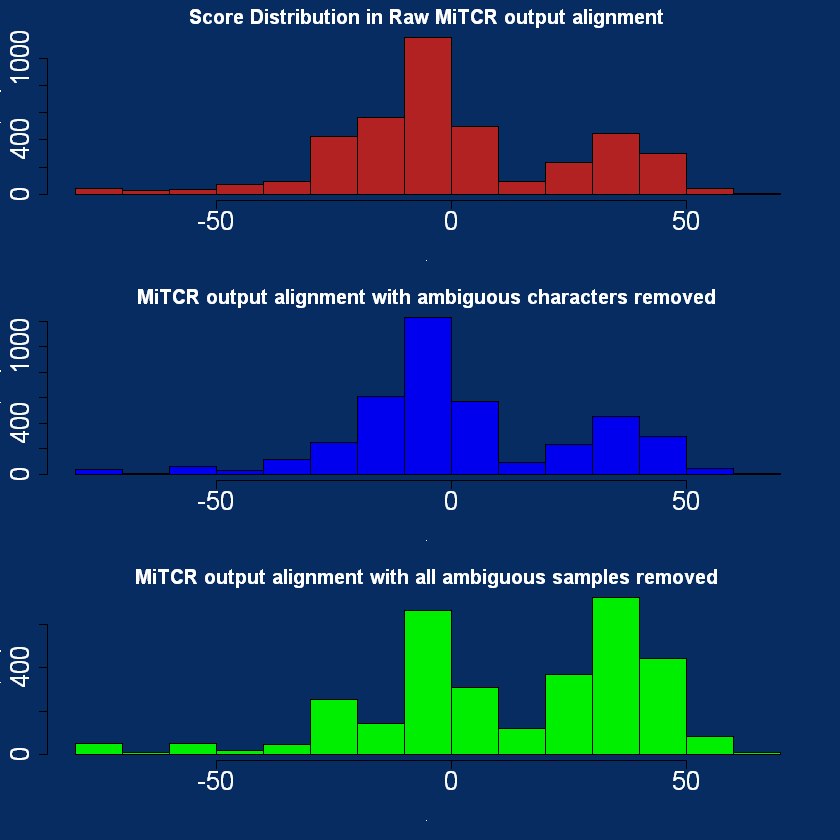

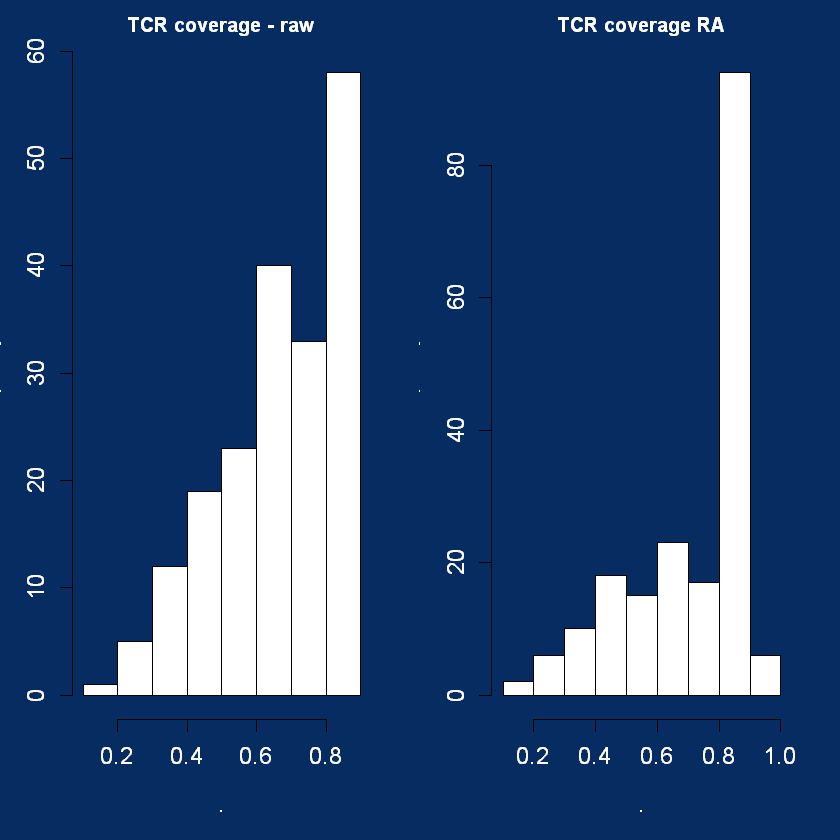

In [10]:
par(mfrow=c(3,1), bg = rgb(7, 44, 98, max = 255), 
    col.main = "white", col.lab = "white", col.axis = "white", 
    cex.axis = 2, cex.main = 1.5)
par(mar = c(5,3,2,2))
sw_annotation %>% map("score") %>% unlist %>% hist(main = "Score Distribution in Raw MiTCR output alignment", col = "firebrick")
sw_annotation_RU %>% map("score") %>% unlist %>% hist(main = "MiTCR output alignment with ambiguous characters removed", col = "blue2")
sw_annotation_RA %>% map("score") %>% unlist %>% hist(main = "MiTCR output alignment with all ambiguous samples removed", col = "green2")# What was the coverage across all samples?

par(mfrow=c(1,2), bg = rgb(7, 44, 98, max = 255), 
    col.main = "white", col.lab = "white", col.axis = "white", 
    cex.axis = 1.2, cex.main = 1)
sw_annotation_RU %>% map("freq") %>% map_dbl(sum) %>% hist(main = "TCR coverage - raw", col = "white")

sw_annotation_RA %>% map("freq") %>% map_dbl(sum) %>% hist(main = "TCR coverage RA", col = "white")

In [11]:
# From here on, we will only be working with the sw_annotation_RA dataset
sw_annotation_RA_HQ <- sw_annotation_RA %>% map(~ filter(., score > 20))


# Maybe try to look at alignments to the query sequence beyond just the best matching one
# I doubt this will be meaningful, however because TCR - epitope matches are very specific
# A single aa difference can totally change the affinity. 
sw_second_annotation_RA_HQ <- list()
for (s in names(sw_annotation_RA_HQ[1:3]) ) {
  sw_second_annotation_RA_HQ[[s]] <- 
    sw_annotation_RA_HQ[[s]] %>% 
    select("query") %>% 
    unlist %>% 
    lapply(function(x) vdjdb_second_search(x, vdjdb_human_beta))
  names(sw_second_annotation_RA_HQ[[s]]) <- s
}

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

ERROR: Error in vdjdb_second_search(x, vdjdb_human_beta): could not find function "vdjdb_second_search"


In [12]:
#### Analysis ####
broad_alignment_results <- sw_annotation_RA_HQ

# Summarise frequencies of each virus in all samples
freq_summaries <- lapply(broad_alignment_results, function(x) x %>%
                           group_by(antigen.species) %>%
                           dplyr::summarise(freq_sum = sum(freq)))

frequency_summaries_full <- freq_summaries %>% 
  Reduce(function(dtf1,dtf2) full_join(dtf1,dtf2,by="antigen.species"), .) 
names(frequency_summaries_full) <- c("antigen.species", names(freq_summaries))

#frequency_summaries_full <- frequency_summaries_full %>% as.list %>% map(na.rm) %>% as.tibble # Not sure why i did this..
#names(frequency_summaries_full) <- c("antigen.species", names(broad_alignment_results))
frequency_summaries_full[is.na(frequency_summaries_full)] <- 0
frequency_summaries_full

antigen.species,bcn1_remove_ambiguous,bcn10_remove_ambiguous,bcn11_remove_ambiguous,bcn12_remove_ambiguous,bcn13_remove_ambiguous,bcn14_remove_ambiguous,bcn15_remove_ambiguous,bcn16_remove_ambiguous,bcn17_remove_ambiguous,...,tp50_remove_ambiguous,tp51_remove_ambiguous,tp52_remove_ambiguous,tp53_remove_ambiguous,tp54_remove_ambiguous,tp55_remove_ambiguous,tp56_remove_ambiguous,tp57_remove_ambiguous,tp58_remove_ambiguous,tp59_remove_ambiguous
CMV,0.06092843,0.528804348,0.188979964,0.0000000,0.032584270,0.018881368,0.045908184,0.388201713,0.19579106,...,0.038900415,0.317476732,0.037037037,0.01572150,0.8170674,0.521523179,0.018939394,0.008865248,0.014909478,0.33632287
EBV,0.01934236,0.000000000,0.015027322,0.0000000,0.000000000,0.021731386,0.005988024,0.006184586,0.00000000,...,0.000000000,0.000000000,0.039094650,0.01909040,0.0000000,0.004139073,0.000000000,0.000000000,0.013312034,0.05082212
HCV,0.02901354,0.000000000,0.000000000,0.0000000,0.011235955,0.002850018,0.000000000,0.000000000,0.00000000,...,0.000000000,0.007238883,0.000000000,0.41661988,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000
HIV-1,0.05125725,0.005434783,0.035519126,0.0000000,0.051685393,0.000000000,0.043912176,0.007611798,0.06426156,...,0.000000000,0.000000000,0.022633745,0.00000000,0.0000000,0.013245033,0.000000000,0.007092199,0.004259851,0.00000000
HomoSapiens,0.01450677,0.003260870,0.007285974,0.0000000,0.012359551,0.010331315,0.028942116,0.000000000,0.05712138,...,0.002593361,0.000000000,0.000000000,0.01066816,0.0000000,0.000000000,0.126262626,0.015957447,0.000000000,0.01793722
InfluenzaA,0.10638298,0.017391304,0.023679417,0.9049826,0.006741573,0.019237620,0.024950100,0.005233111,0.08944006,...,0.579875519,0.027921406,0.008230453,0.03481190,0.0000000,0.000000000,0.000000000,0.033687943,0.054313099,0.01644245
YellowFeverVirus,0.00000000,0.000000000,0.069216758,0.0000000,0.000000000,0.000000000,0.000000000,0.015699334,0.00000000,...,0.000000000,0.000000000,0.008230453,0.01516002,0.0000000,0.000000000,0.005050505,0.000000000,0.006389776,0.00000000
DENV1,0.00000000,0.000000000,0.000000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,...,0.000000000,0.000000000,0.020576132,0.00000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.02017937
DENV3/4,0.00000000,0.000000000,0.000000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,...,0.000000000,0.000000000,0.000000000,0.00000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000
DENV2,0.00000000,0.000000000,0.000000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,...,0.000000000,0.000000000,0.000000000,0.00000000,0.0000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000


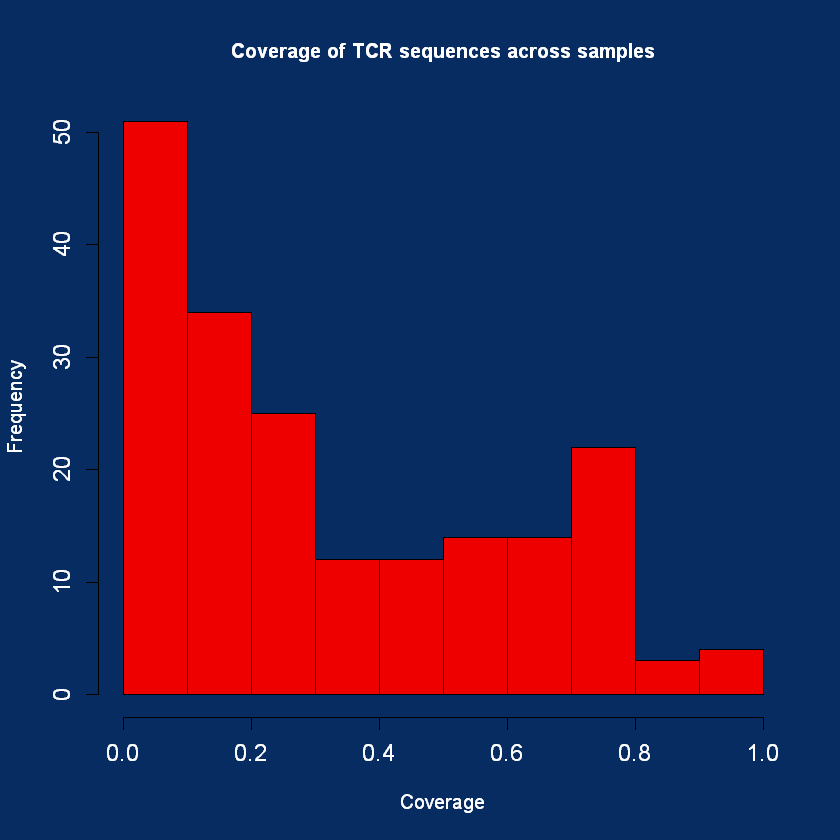

In [27]:
EBV_TCR_pcents <- frequency_summaries_full %>% filter(antigen.species == "EBV") %>% select(-antigen.species) %>% as_vector
names(EBV_TCR_pcents) %<>% str_remove("_remove_ambiguous")

# How much of the TCR repertoir was I able to recover?
par(bg = rgb(7, 44, 98, max = 255), 
    col.main = "white", col.lab = "white", col.axis = "white", 
    cex.axis = 1.2, cex.main = 1)
hist(colSums(frequency_summaries_full %>% select(-antigen.species)), col = "red2", 
     main = "Coverage of TCR sequences across samples", 
     xlab = "Coverage")

# Summarise Counts
count_summaries <- lapply(broad_alignment_results, function(x) x %>% group_by(antigen.species) %>% dplyr::summarise(freq_sum = sum(count)))
count_summaries_full <- count_summaries %>% 
  Reduce(function(dtf1,dtf2) full_join(dtf1,dtf2,by="antigen.species"), .) 
names(count_summaries_full) <- c("antigen.species", names(count_summaries))
count_summaries_full[is.na(count_summaries_full)] <- 0 # Change NAs to 0s

EBV_TCR_counts <- count_summaries_full %>% filter(antigen.species == "EBV") %>% select(-antigen.species) %>% as_vector
names(EBV_TCR_counts) %<>% str_remove("_remove_ambiguous")

In [13]:
# Load in Patient Metadata
setwd("C:/Users/jee12/Dropbox/Rabadan_Lab/tcr/")
metadata <- read_tsv("metadata.tsv")

subtypes <- metadata$subtype
names(subtypes) <- metadata$sample

EBV_TCR <- tibble(sample = rownames(VRPMHR)) %>% 
  mutate(EBV = VRPMHR[sample,]$EBV) %>%
  mutate(TCR_pcent = EBV_TCR_pcents[sample]) %>%
  mutate(TCR_count = EBV_TCR_counts[sample]) %>%
  mutate(lgEBV = log(EBV + 1)) %>% 
  mutate(lgTCR_count = log(TCR_count + 1)) %>%
  mutate(subtype = subtypes[sample])

t <- ggplot(EBV_TCR, aes(y = lgTCR_count, x = lgEBV, colour = subtype)) +
  geom_point(size = 3) +
  theme(axis.text.x=element_text(angle=90,size=12,colour="black"), 
        panel.background = element_rect(fill = 'gray90', colour="black"),
        panel.grid.major = element_line(colour = "white"),
        axis.text.y=element_text(size=12,colour="black"), 
        axis.title.x=element_text(size=15,colour="black"), 
        axis.title.y=element_text(size=15,colour="black"),
        legend.title=element_text(size=15,colour="black"),
        legend.text=element_text(size=15,colour="black"),
        legend.position="left") +
  ggtitle("Observed EBV and TCR comparison")

t

EBV_TCR


Parsed with column specification:
cols(
  sample = col_character(),
  subtype = col_character(),
  WES = col_character(),
  EBV_K5 = col_character(),
  EBV_K4 = col_character(),
  tot_viral_load_group = col_character(),
  lyt_lat_cmv = col_character(),
  lyt_lab_ebv = col_character(),
  lyt_lat_hhv6b = col_character(),
  lyt_lat_kshv = col_character()
)


ERROR: Error in rownames(VRPMHR): object 'VRPMHR' not found


In [ ]:
x <- EBV_TCR %>% filter(subtype %in% c("ALCL", "AITL")) %>% select(TCR_pcent, subtype)
t.test(TCR_pcent ~ subtype, x)#### Summary of all Found Epitope Species ####
epitope_summary <- frequency_summaries_full %>% data.frame(row.names = 1) %>% t %>% colSums
epitope_summary <- tibble(virus = names(epitope_summary), total = epitope_summary) %>% arrange(desc(total))
epitope_summary$virus <- with(epitope_summary, factor(epitope_summary$virus, epitope_summary$virus, ordered=T))
epitope_summary %<>% mutate(pcent = total / sum(total))

db_virus_totals <- vdjdb_human_beta$antigen.species %>% table %>% as.tibble
names(db_virus_totals) <- c("virus", "db_totals")

epitope_summary %<>% left_join(db_virus_totals)
epitope_summary %<>% mutate(db_pcent = db_totals / sum(db_totals) %>% as.numeric())

# Plot the barplot
par(bg = rgb(7, 44, 98, max = 255), 
    col.main = "white", col.lab = "white", col.axis = "white", 
    cex.axis = .8, cex.main = 1, fg = "white", mar = c(7,3,2,2))
barplot(epitope_summary %>% select(pcent, db_pcent) %>% as.matrix %>% t,
        beside = TRUE, col = c("firebrick", "yellow2"), 
        main = "TCR recovery vs. Database",
        names.arg = epitope_summary$virus, 
        legend.text = c("Observed", "Expected"),
        las = 2)

ggplot(epitope_summary, aes(x = virus, y = total)) +
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=total), vjust=1.6, color="white", size=3.5)+
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  ggtitle("Summary of Identified Epitope Species Across Samples")

# How does this compare to normal, non PTCL samples?
setwd("parsed/")
control_tcr_tables <- lapply(list.files(), function(x) x %>%
                               read_tsv %>% 
                               dplyr::rename(cdr3aa = CDR3.amino.acid.sequence) %>%
                               mutate(freq = Read.count / sum(Read.count)) %>%
                               dplyr::rename(count = Read.count))
names(control_tcr_tables) <- tools::file_path_sans_ext(list.files())

control_alignment <- batch_vdjdb_align(control_tcr_tables, vdjdb_human, strand = "beta", retain_extras = "remove_ambiguous")
antigen_summary <- control_alignment %>% map("antigen.species") %>% unlist %>% table %>% as.tibble
names(antigen_summary) <- c("virus", "control_total")
epitope_summary %<>% left_join(antigen_summary)
epitope_summary[is.na(epitope_summary)] <- 0
epitope_summary %<>% mutate(control_pcent = control_total / sum(control_total))

barplot(epitope_summary %>% select(pcent, control_pcent, db_pcent) %>% as.matrix %>% t,
        beside = TRUE, col = c("firebrick", "blue3", "yellow2"), 
        main = "TCR recovery (Control Dataset) vs. Database",
        names.arg = epitope_summary$virus, 
        legend.text = c("Observed", "Observed (control)", "Expected"),
        las = 2)


#### Boxplot of TCR counts per sample ####
EBV_TCR_o <- EBV_TCR %>% mutate(subtype = subtype %>% factor(levels = c("ALCL", "AITL", "NK", "NOS")))
EBV_TCR_o <- EBV_TCR_o %>% gather(key = measure, lgCount, lgEBV,lgTCR_count)

ggplot(EBV_TCR_o, aes(x = measure, y = lgCount, fill = measure)) +
  geom_boxplot() + facet_wrap("subtype", nrow = 1) +
  theme(axis.text.x = element_blank()) +
  scale_fill_discrete(labels = c("log EBV reads", "log EBV epitope"),
                      name = "Measure")